In [49]:
import pickle
import numpy as np

import sys
sys.path.append('../../../')
import ndrought.drought_network_v12 as dnet
import ndrought.wrangle_v11 as dnw
import ndrought.plotting as nplot

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import xarray as xr

from tqdm.autonotebook import tqdm

import geopandas as gpd

In [2]:
paired_ds = xr.open_dataset('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/paired_ds/usdm_spi_paired.nc')

(array([66112191.,        0., 33193336.,        0., 29777753.,        0.,
        27008863.,        0., 16953803.,  5020793.]),
 array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]),
 <BarContainer object of 10 artists>)

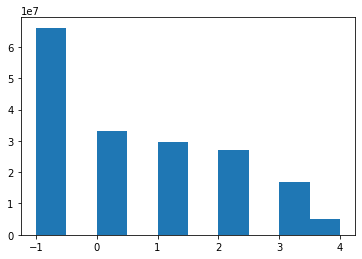

In [18]:
plt.hist(paired_ds['USDM'].values.ravel())

In [14]:
area_constant = 18.1

In [52]:
df = gpd.read_file('/pool0/home/steinjao/data/drought/drought_impact/data/geometry/tl_2022_us_state.shp')
df.to_crs("EPSG:4326");
non_continental = ['HI','VI','MP','GU','AK','AS','PR']
us49 = df
for n in non_continental:
    us49 = us49[us49.STUSPS != n]

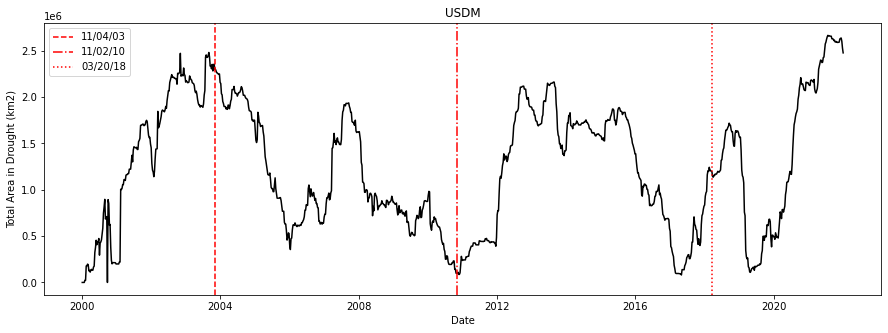

In [62]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(paired_ds['USDM Date'].values, (paired_ds['USDM'].values >= 1).sum(axis=(1,2))*area_constant, color='k')
ax.set_ylabel('Total Area in Drought (km2)')
ax.set_xlabel('Date')
ax.set_title('USDM')
fig.set_facecolor('w')
ax.axvline(paired_ds['USDM Date'].values[200], color='r', linestyle='--', label=pd.to_datetime(paired_ds['USDM Date'].values[200]).strftime('%D'))
ax.axvline(paired_ds['USDM Date'].values[565], color='r', linestyle='-.', label=pd.to_datetime(paired_ds['USDM Date'].values[565]).strftime('%D'))
ax.axvline(paired_ds['USDM Date'].values[950], color='r', linestyle='dotted', label=pd.to_datetime(paired_ds['USDM Date'].values[950]).strftime('%D'))
ax.legend()

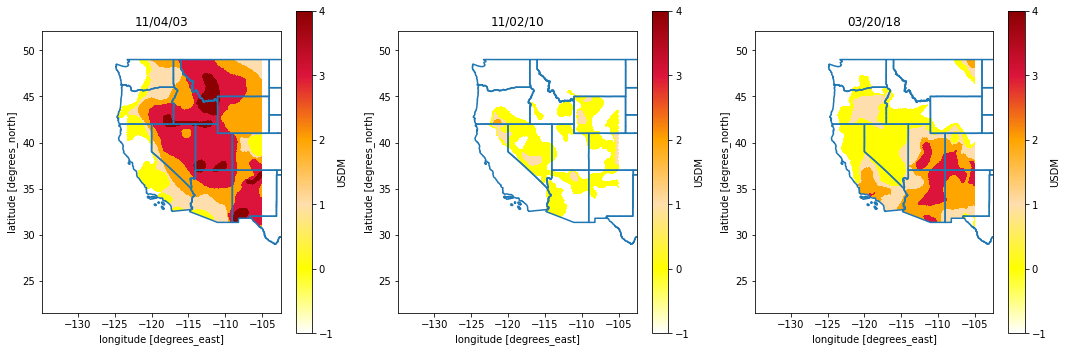

In [64]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

reproj_usdm = paired_ds['USDM'].rio.set_crs('EPSG:5070').rio.reproject('EPSG:4326')

for i, ax in zip([200, 565, 950], axs.ravel()):
    reproj_usdm.sel(index=i).plot(ax=ax, vmin=-1, vmax=4, cmap=nplot.usdm_cmap())
    us49.boundary.plot(ax=ax)
    ax.set_title(pd.to_datetime(paired_ds['USDM Date'].values[i]).strftime('%D'))
fig.set_facecolor('w')
plt.tight_layout()

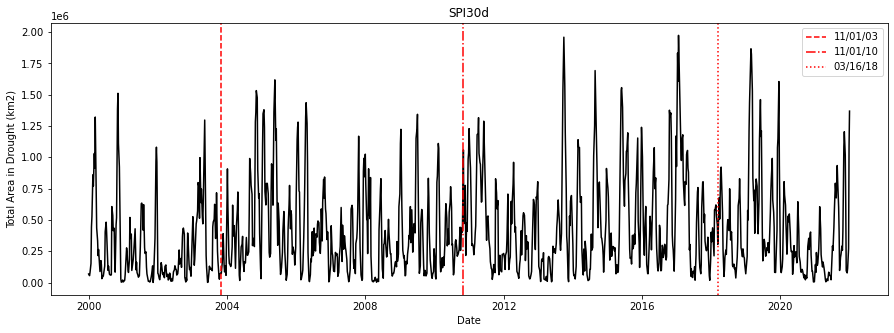

In [66]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(paired_ds['SPI Date'].values, (paired_ds['spi_30d'].values >= 1).sum(axis=(1,2))*area_constant, color='k')
ax.set_ylabel('Total Area in Drought (km2)')
ax.set_xlabel('Date')
ax.set_title('SPI30d')
fig.set_facecolor('w')
ax.axvline(paired_ds['SPI Date'].values[200], color='r', linestyle='--', label=pd.to_datetime(paired_ds['SPI Date'].values[200]).strftime('%D'))
ax.axvline(paired_ds['SPI Date'].values[565], color='r', linestyle='-.', label=pd.to_datetime(paired_ds['SPI Date'].values[565]).strftime('%D'))
ax.axvline(paired_ds['SPI Date'].values[950], color='r', linestyle='dotted', label=pd.to_datetime(paired_ds['SPI Date'].values[950]).strftime('%D'))
ax.legend()

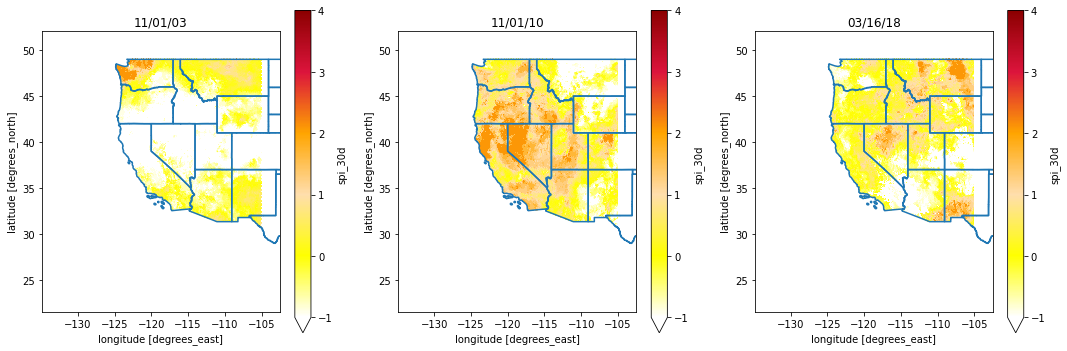

In [68]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

reproj_spi30d = paired_ds['spi_30d'].rio.set_crs('EPSG:5070').rio.reproject('EPSG:4326')

for i, ax in zip([200, 565, 950], axs.ravel()):
    reproj_spi30d.sel(index=i).plot(ax=ax, vmin=-1, vmax=4, cmap=nplot.usdm_cmap())
    us49.boundary.plot(ax=ax)
    ax.set_title(pd.to_datetime(paired_ds['SPI Date'].values[i]).strftime('%D'))
fig.set_facecolor('w')
plt.tight_layout()

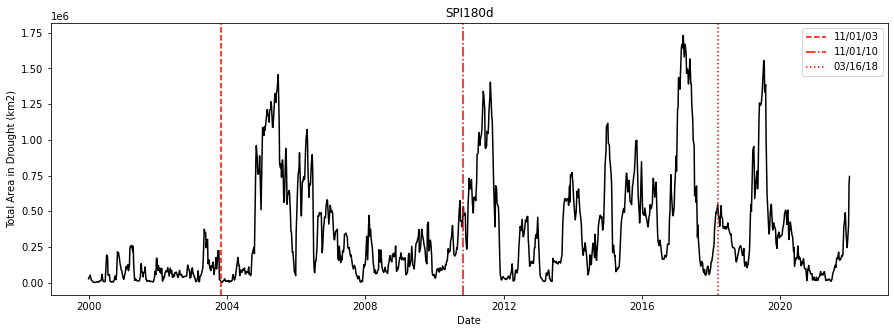

In [65]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(paired_ds['SPI Date'].values, (paired_ds['spi_180d'].values >= 1).sum(axis=(1,2))*area_constant, color='k')
ax.set_ylabel('Total Area in Drought (km2)')
ax.set_xlabel('Date')
ax.set_title('SPI180d')
fig.set_facecolor('w')
ax.axvline(paired_ds['SPI Date'].values[200], color='r', linestyle='--', label=pd.to_datetime(paired_ds['SPI Date'].values[200]).strftime('%D'))
ax.axvline(paired_ds['SPI Date'].values[565], color='r', linestyle='-.', label=pd.to_datetime(paired_ds['SPI Date'].values[565]).strftime('%D'))
ax.axvline(paired_ds['SPI Date'].values[950], color='r', linestyle='dotted', label=pd.to_datetime(paired_ds['SPI Date'].values[950]).strftime('%D'))
ax.legend()

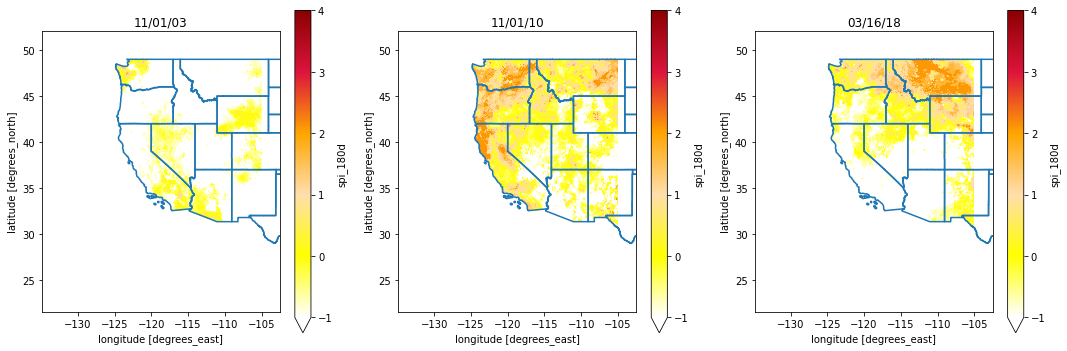

In [69]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

reproj_spi180d = paired_ds['spi_180d'].rio.set_crs('EPSG:5070').rio.reproject('EPSG:4326')

for i, ax in zip([200, 565, 950], axs.ravel()):
    reproj_spi180d.sel(index=i).plot(ax=ax, vmin=-1, vmax=4, cmap=nplot.usdm_cmap())
    us49.boundary.plot(ax=ax)
    ax.set_title(pd.to_datetime(paired_ds['SPI Date'].values[i]).strftime('%D'))
fig.set_facecolor('w')
plt.tight_layout()